In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder

In [ ]:
data = pd.read_csv("../input/home-credit-default-risk/application_train.csv")
data

In [ ]:
#Số column của data set
print('Số column của bộ data:',data.shape[1])

In [ ]:
#Dạng dữ liệu của từng column
data_types = data.dtypes
data_types

In [ ]:
#Missing data = True
data.isnull()

In [ ]:
#Lượng data missing ở mỗi côt
data.isnull().sum()

In [ ]:
#Tỉ lệ missing data ở các cột
percent_missing = data.isnull().sum() * 100 / len(data)
percent_missing[percent_missing != 0].sort_values(ascending=False).head(20)

- Nominal Variable (Categorical). Variable comprises a finite set of discrete values with no relationship between values.
- Ordinal Variable. Variable comprises a finite set of discrete values with a ranked ordering between values.
- One-hot Coding
> - One column for each value to compare vs. all other values. 
> - Use this categorical data encoding technique when the features are nominal(do not have any order) or Ordinal
> - Create a new column for each unique category in a categorical variable. Each observation recieves a 1 in the column for its corresponding category and a 0 in all other new columns.
- Ordinal Coding
> - Convert string labels to integer values 1 through k. 
> - Use this categorical data encoding technique when the categorical feature is ordinal
> - Assign each unique category in a categorical variable with an integer. No new columns are created

In [ ]:
#Số lượng cột non-numeric
data_obj = data_types[data_types == object]
data_obj.shape[0]
data_obj

* NAME_CONTRACT_TYPE: Loại hợp đồng(Cash loans, Revolving loans)
* CODE_GENDER: Giới tính khách hàng (M, F, XNA)
* FLAG_OWN_CAR: Khách hàng có sở hữu oto hay không (Y, N)
* FLAG_OWN_REALTY: Khách hàng có sở hữu nhà hay căn hộ không (Y, N)
* NAME_TYPE_SUITE: Ai đi cùng khách hàng khi khách hàng thực hiện khoản vay
* WEEKDAY_APPR_PROCESS_START: Khách hàng thực hiện khoản vay vào thứ mấy
* ORGANIZATION_TYPE: Dạng tổ chức mà khách hàng đang làm việc
* FONDKAPREMONT_MODE: Thông tin về tòa nhà khách hàng sống           
* HOUSETYPE_MODE: Thông tin về tòa nhà khách hàng sống                
* WALLSMATERIAL_MODE: Thông tin về tòa nhà khách hàng sống            
* EMERGENCYSTATE_MODE: Thông tin về tòa nhà khách hàng sống  
* NAME_INCOME_TYPE: Dạng thu nhập của khách hàng
* NAME_EDUCATION_TYPE: Trình độ học vấn của khách hàng 
* NAME_FAMILY_STATUS: Tình trạng hôn nhân cua khách hàng  
* NAME_HOUSING_TYPE: Tình trạng nhà ở cua khách hàng (đi thuê, sống với gia đình)         
* OCCUPATION_TYPE: Nghề nghiệp của khách hàng


In [ ]:
data.select_dtypes('object').apply(pd.Series.nunique)

- Đối với Ordinal Encoding khi ta gán các giá trị với 1 số nguyên thì các giá trị này sẽ được gán theo thứ tự abc
- Ví dụ với feature NAME_INCOME_TYPE sẽ có các giá trị:

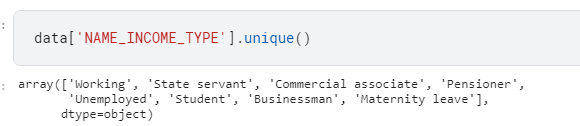
- Khi sử dụng attribute categories trong qúa trình fit ta sẽ thấy các giá trị được sắp xếp theo thứ tự abc

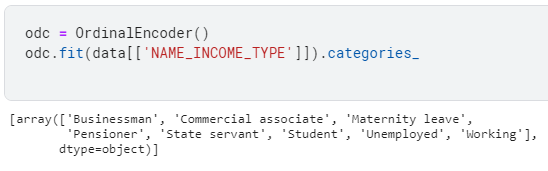
- Tức khi sử dụng Ordinal Encoding ta sẽ nhận được số nguyên ứng với các giá trị như sau

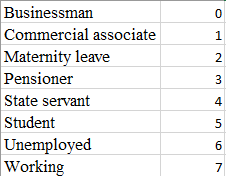
- Khi thực hiện Ordinal Encoding, mô hình có thể sử dụng giá trị tuyến tính của các feature (ví dụ Businessmen = 7, Student = 0), nếu category chỉ có 2 giá trị (ví dụ Y/N), Ordinal encoding khá ổn nhưng khi có từ 2 giá trị trở lên thì One-hot Encoding sẽ là lựa chọn an toàn hơn



In [ ]:
#Với các feature (dtype=object) có 2 unique value ta sẽ sử dụng Ordinal Encoding
enc = OrdinalEncoder()
count = 0
for col in data:
    if data[col].dtypes == 'object':
        if len(data[col].unique()) <= 2:
            data[col] = enc.fit_transform(data[[col]])
            count += 1
print(f'Tổng số column đã được Ordinal Encoding: {count}')

In [ ]:
#One hot encoding những feature còn lại
data = pd.get_dummies(data)
data

In [ ]:
print('Số column của bộ data mới:',data.shape[1])